Разделяем датасет на тренировочную, валидационную и тестовую выборки

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#input_folder = "/content/drive/MyDrive/mushrooms"
#splitfolders.ratio(input_folder, "/content/drive/MyDrive/mushrooms_splited", ratio=(0.70, 0.2, 0.1), seed=13, group_prefix=None)

Импорты

In [4]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
from keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Препроцессинг данных

In [5]:
IMG_SIZE = 128
BATCH_SIZE = 32
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
EPOCHS = 100

In [6]:
train_dir = "/content/drive/MyDrive/mushrooms_splited/train" 
val_dir = "/content/drive/MyDrive/mushrooms_splited/val"
test_dir = "/content/drive/MyDrive/mushrooms_splited/test"

In [7]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    rotation_range=30,
    zoom_range=0.25,
    horizontal_flip=True,
    rescale=1./255
)

train_generator = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    directory=val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_generator = datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 4757 images belonging to 9 classes.
Found 1356 images belonging to 9 classes.
Found 687 images belonging to 9 classes.


Построение нейронной сети и обучение модели

In [8]:
model = Sequential()

model.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', input_shape=INPUT_SHAPE, padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
          
model.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
        
model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                        

In [9]:
model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(9, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                        

In [10]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=149,
    validation_data=val_generator,
    validation_steps=42
)

Epoch 1/100
149/149 [==============================] - 1300s 9s/step - loss: 2.6476 - accuracy: 0.1974 - val_loss: 2.6232 - val_accuracy: 0.1749
Epoch 2/100
149/149 [==============================] - 318s 2s/step - loss: 2.1925 - accuracy: 0.2550 - val_loss: 2.2864 - val_accuracy: 0.1860
Epoch 3/100
149/149 [==============================] - 306s 2s/step - loss: 2.0658 - accuracy: 0.2830 - val_loss: 2.0509 - val_accuracy: 0.2768
Epoch 4/100
149/149 [==============================] - 307s 2s/step - loss: 1.9010 - accuracy: 0.3189 - val_loss: 1.8443 - val_accuracy: 0.3475
Epoch 5/100
149/149 [==============================] - 304s 2s/step - loss: 1.8214 - accuracy: 0.3485 - val_loss: 1.8470 - val_accuracy: 0.3304
Epoch 6/100
149/149 [==============================] - 317s 2s/step - loss: 1.7858 - accuracy: 0.3572 - val_loss: 1.9721 - val_accuracy: 0.3095
Epoch 7/100
149/149 [==============================] - 306s 2s/step - loss: 1.7168 - accuracy: 0.3818 - val_loss: 2.1695 - val_accuracy

Построим графики функции ошибки и точности для тренировочной и валидационной выборок

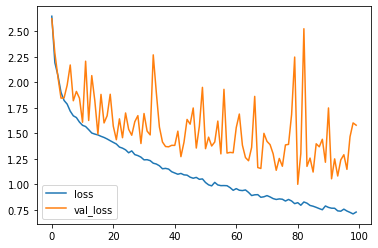

In [15]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot();

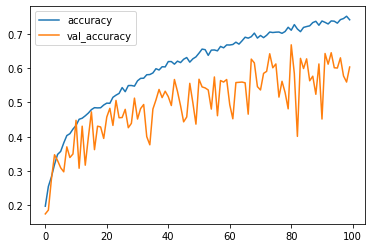

In [12]:
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

Делаем предсказание на тестовом датасете, находим точность предсказаний и строим confusion matrix

In [13]:
nb_samples = 687 # number of test images
Y_pred = model.predict(test_generator, nb_samples // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
# x is true class, y is predicted class-- middle diagonal represents the accurate predictions

22/22 [==============================] - 152s 7s/step
Confusion Matrix
[[ 18   3   1   0   1   0   8   5   0]
 [  1  50   5   0   1   0  16   2   0]
 [  2   0  96   0   0   0  10   1   1]
 [  3   2   6  15   0   1  52   3   3]
 [  1   4   2   0  11   0  19   1   0]
 [  1   3   2   2   0   9  11   1   4]
 [  2   4  12   1   2   0 131   6   1]
 [  3   4   5   0   0   0  34  72   0]
 [  2   0   6   0   0   0  14   4   7]]


In [14]:
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    Agaricus       0.55      0.50      0.52        36
     Amanita       0.71      0.67      0.69        75
     Boletus       0.71      0.87      0.78       110
 Cortinarius       0.83      0.18      0.29        85
    Entoloma       0.73      0.29      0.42        38
   Hygrocybe       0.90      0.27      0.42        33
   Lactarius       0.44      0.82      0.58       159
     Russula       0.76      0.61      0.68       118
     Suillus       0.44      0.21      0.29        33

    accuracy                           0.60       687
   macro avg       0.68      0.49      0.52       687
weighted avg       0.66      0.60      0.57       687

